# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)

### Naložimo pandas in podatke

In [1]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
# select an interactive "notebook" plot style
import matplotlib
import matplotlib.pyplot as plt
%matplotlib

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('../predavanja/obdelani-podatki/filmi.csv', index_col='id')

Using matplotlib backend: TkAgg


Poglejmo si podatke.

In [8]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [9]:
filmi.sort_values('ocena', ascending=False)

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
111161,Kaznilnica odrešitve,142,1994,9.3,80.0,2003395,28341469.0,Two imprisoned men bond over a number of years...
68646,Boter,175,1972,9.2,100.0,1372528,134966411.0,The aging patriarch of an organized crime dyna...
71562,"Boter, II. del",202,1974,9.0,90.0,950252,57300000.0,The early life and career of Vito Corleone in ...
468569,Vitez teme,152,2008,9.0,84.0,1972591,534858444.0,When the menace known as the Joker emerges fro...
...,...,...,...,...,...,...,...,...
1098327,Dragonball Evolution,85,2009,2.6,45.0,63966,9353573.0,The young warrior Son Goku sets out on a quest...
185183,Battlefield Earth,118,2000,2.4,9.0,71149,21471685.0,It's the year 3000 A.D.; the Earth is lost to ...
799949,Velik film,86,2007,2.3,17.0,96182,39739367.0,A comedic satire of films that are large in sc...


Poberite stolpec ocen.

In [10]:
filmi[['ocena']]

,ocena
id,
12349,8.3
13442,8.0
15864,8.2
17136,8.3
17925,8.2
...,...
5813916,9.4
5988370,1.8
6294822,7.2


Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [11]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [12]:
filmi.ocena.round()

id
12349      8.0
13442      8.0
15864      8.0
17136      8.0
17925      8.0
          ... 
5813916    9.0
5988370    2.0
6294822    7.0
6644200    8.0
7784604    7.0
Name: ocena, Length: 2500, dtype: float64

Dodajte zaokrožene vrednosti v podatke.

In [13]:
filmi['zaokrozene_ocene'] = filmi.ocena.round()

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [14]:
filmi = filmi.drop(columns='zaokrozene_ocene')

In [15]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...
6294822,Zamolčani dokumenti,116,2017,7.2,83.0,89674,81903458.0,A cover-up that spanned four U.S. Presidents p...


### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [16]:
slice = filmi[['naslov','leto','glasovi']].copy()
slice['zaokrozene ocene'] = filmi.ocena.round()
slice

,naslov,leto,glasovi,zaokrozene ocene
id,,,,
12349,The Kid,1921,90443,8.0
13442,"Nosferatu, simfonija groze",1922,77975,8.0
15864,Zlata mrzlica,1925,85136,8.0
17136,Metropolis,1927,136601,8.0
17925,General,1926,68196,8.0
...,...,...,...,...
5813916,Dag II,2016,98201,9.0
5988370,Reis,2017,71685,2.0
6294822,Zamolčani dokumenti,2017,89674,7.0


### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [17]:
filmi[(filmi.leto < 1930) | (filmi.leto > 2017)]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
...,...,...,...,...,...,...,...,...
5164214,Oceanovih 8,110,2018,6.3,61.0,91163,139377762.0,Debbie Ocean gathers an all-female crew to att...
5164432,"Z ljubeznijo, Simon",110,2018,7.7,72.0,62350,40826341.0,Simon Spier keeps a huge secret from his famil...
5463162,Deadpool 2,119,2018,7.9,66.0,279452,318490305.0,Foul-mouthed mutant mercenary Wade Wilson (AKA...


Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [18]:
def at_most_two(string):
    return not (len(string.split()) > 2)
filmi[filmi.naslov.apply(at_most_two)]

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
id,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev..."
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...
21749,Luči velemesta,87,1931,8.5,NaN,138228,19181.0,"With the aid of a wealthy erratic tippler, a d..."
...,...,...,...,...,...,...,...,...
5776858,Phantom Thread,130,2017,7.6,90.0,71395,21023275.0,"Set in 1950's London, Reynolds Woodcock is a r..."
5813916,Dag II,135,2016,9.4,NaN,98201,NaN,In a desolate war zone where screams of the in...
5988370,Reis,108,2017,1.8,NaN,71685,NaN,A drama about the early life of Recep Tayyip E...


### Histogrami

Združite filme po ocenah in jih preštejte.

In [19]:
filmi_rating = filmi.groupby('ocena')
filmi_rating = filmi_rating.size()
filmi_rating

ocena
1.8    1
1.9    1
2.3    1
2.4    1
2.6    1
      ..
8.9    5
9.0    2
9.2    1
9.3    1
9.4    1
Length: 61, dtype: int64

Naredite stolpični diagram teh podatkov.

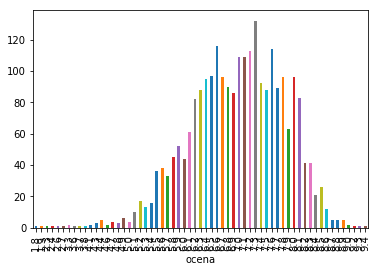

In [20]:
filmi_rating.plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

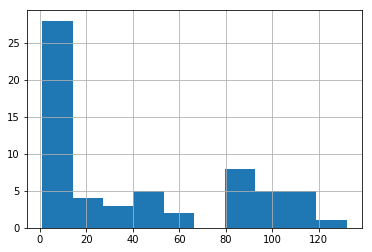

In [25]:
filmi_rating.hist()

### Izris povprečne dolžine filma glede na leto

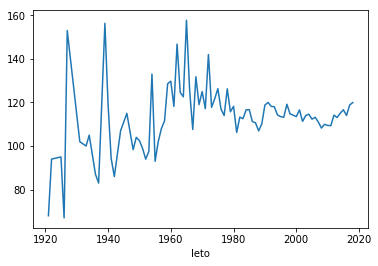

In [32]:
filmi_year = filmi.groupby('leto')
filmi_year_mean_length = filmi_year.mean()['dolzina']
filmi_year_mean_length.plot()

### Izris skupnega zasluzka za posamezno leto

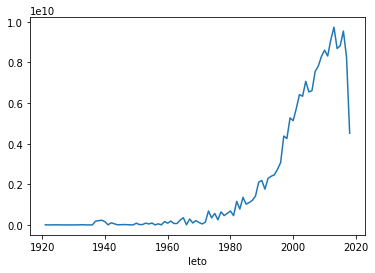

In [38]:
filmi_year_sum_revenue = filmi_year.sum()['zasluzek']
filmi_year_sum_revenue.plot()